In [39]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [40]:
# Import datasets as train datasets
df_train = pd.read_csv('data.csv')

In [41]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [42]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
df_train.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [44]:
df_train.duplicated().sum()

0

In [45]:
df_train.drop(columns = ['id','Unnamed: 32'], axis = 1, inplace = True)

In [46]:
df_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


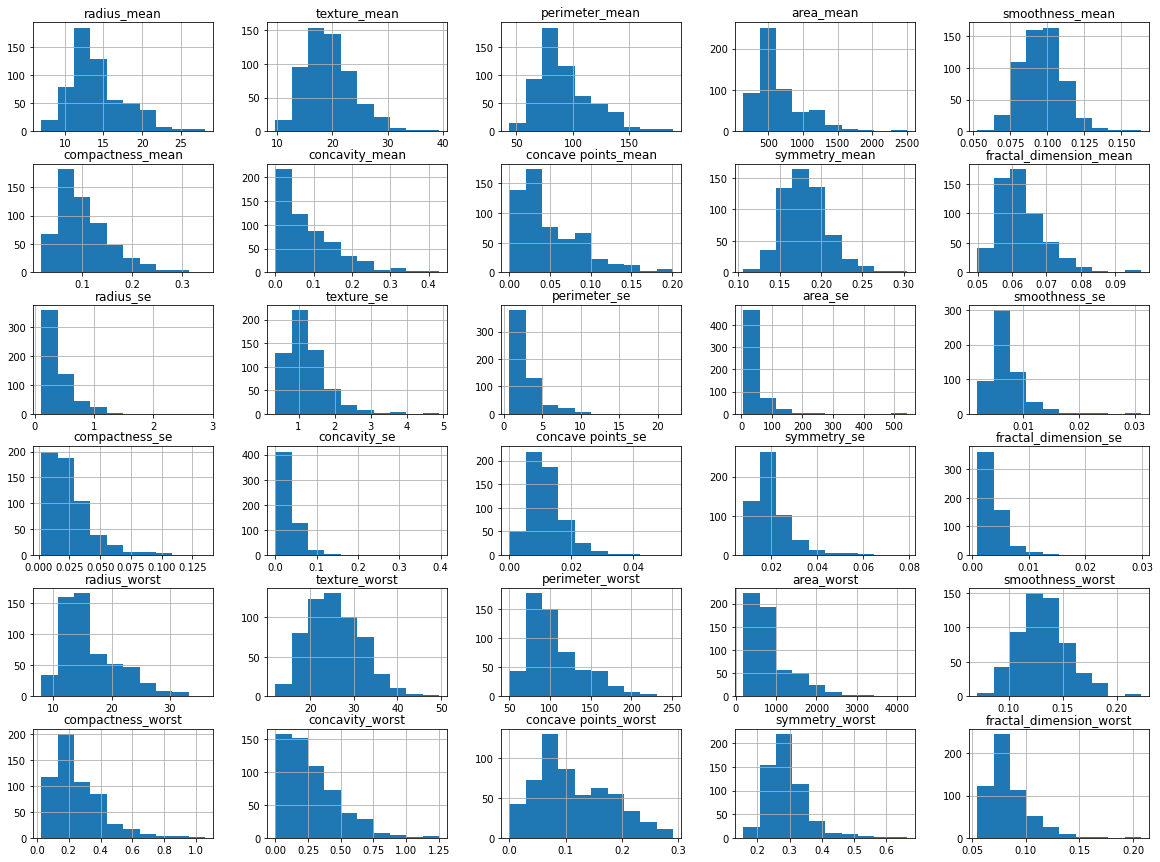

In [47]:
df_train.hist(figsize = (20, 15))
plt.show()

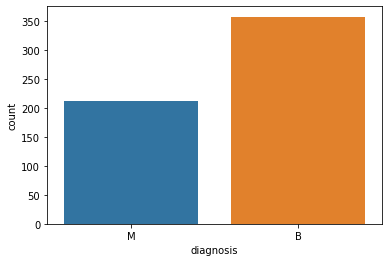

In [48]:
sns.countplot(x='diagnosis', data=df_train);

In [49]:
# Convert 'diagnosis' column to numerical representation (e.g., 0 and 1)
df_train['diagnosis_numeric'] = pd.factorize(df_train['diagnosis'])[0]

# Calculate the proportion
proportion_Malignant = df_train['diagnosis'].value_counts(normalize=True)['M']
proportion_Benign = df_train['diagnosis'].value_counts(normalize=True)['B']

# Print the proportions
print("Proportion of Malignant:", proportion_Malignant)
print("Proportion of Benign:", proportion_Benign)

Proportion of Malignant: 0.37258347978910367
Proportion of Benign: 0.6274165202108963


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# Separate features (X) and target (y)
X = df_train.drop(['diagnosis', 'diagnosis_numeric'], axis=1)
y = df_train['diagnosis_numeric']

In [52]:
# Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
# Create a new balanced DataFrame
df_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_train_balanced['diagnosis_numeric'] = y_resampled

In [54]:
# Calculate the proportion
proportion_Malignant = df_train_balanced['diagnosis_numeric'].value_counts(normalize=True)[1]
proportion_Benign = df_train_balanced['diagnosis_numeric'].value_counts(normalize=True)[0]

# Print the proportions
print("Proportion of Malignant:", proportion_Malignant)
print("Proportion of Benign:", proportion_Benign)

Proportion of Malignant: 0.5
Proportion of Benign: 0.5


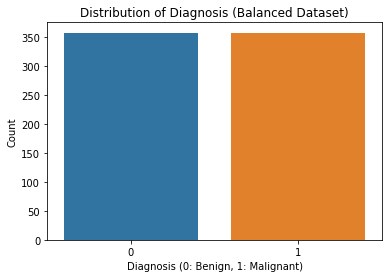

In [55]:
# Assuming 'diagnosis_numeric' is the column representing the target variable
sns.countplot(x='diagnosis_numeric', data=df_train_balanced)
plt.title('Distribution of Diagnosis (Balanced Dataset)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

In [60]:
# Step 1: Display the columns of X_resampled to identify any extra columns
print("Columns in X_resampled:", X_resampled.columns)

# Step 2: If 'diagnosis_numeric' is present in X_resampled, drop it
# This assumes 'diagnosis_numeric' or another unexpected column might be there.
if 'diagnosis_numeric' in X_resampled.columns:
    X_resampled = X_resampled.drop(columns=['diagnosis_numeric'])

# Step 3: Re-run the scaling process after ensuring only the intended features are present
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_resampled)

# Convert scaled features back to DataFrame and add 'diagnosis_numeric' as target
df_train_scaled = pd.DataFrame(scaled_features, columns=X_resampled.columns)
df_train_scaled['diagnosis_numeric'] = diagnosis_numeric

print("Final DataFrame Shape:", df_train_scaled.shape)  # Should now be (714, 31)



Columns in X_resampled: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_numeric'],
      dtype='object')
Final DataFrame Shape: (714, 31)


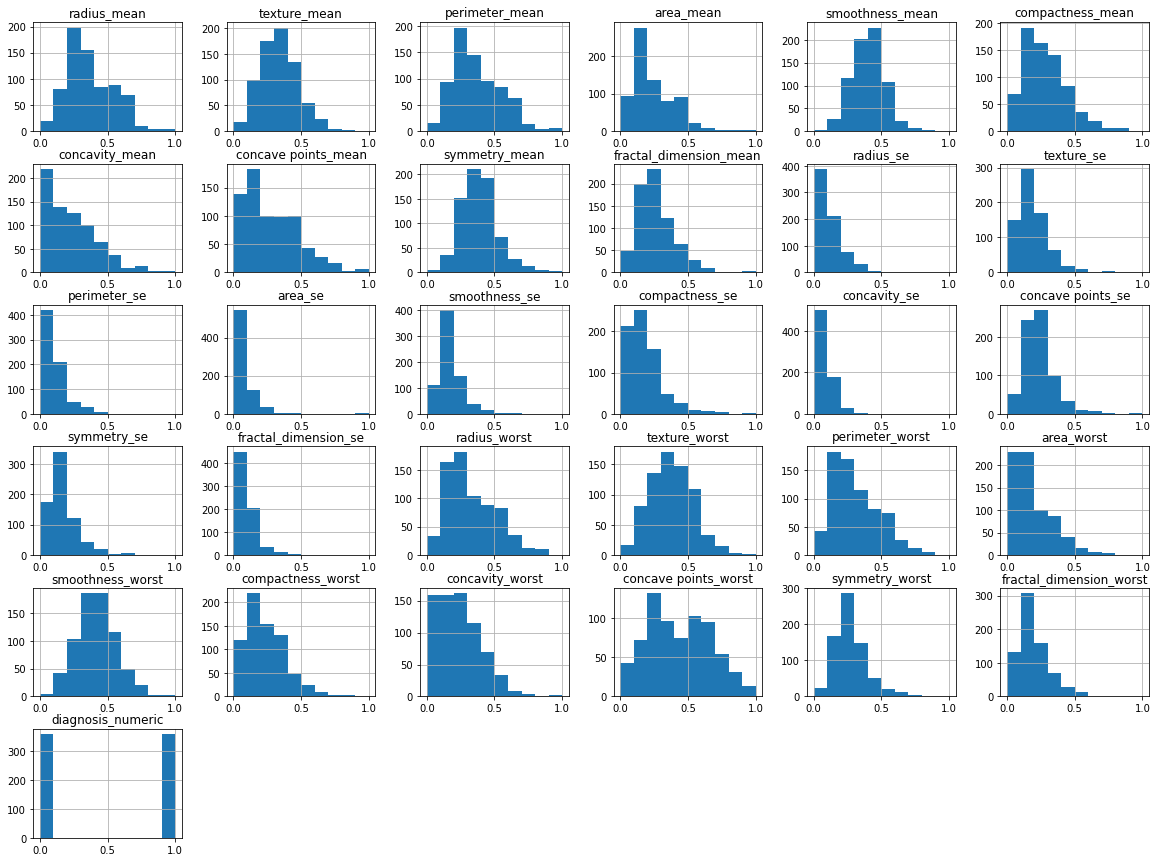

In [61]:
df_train_scaled.hist(figsize = (20, 15))
plt.show()


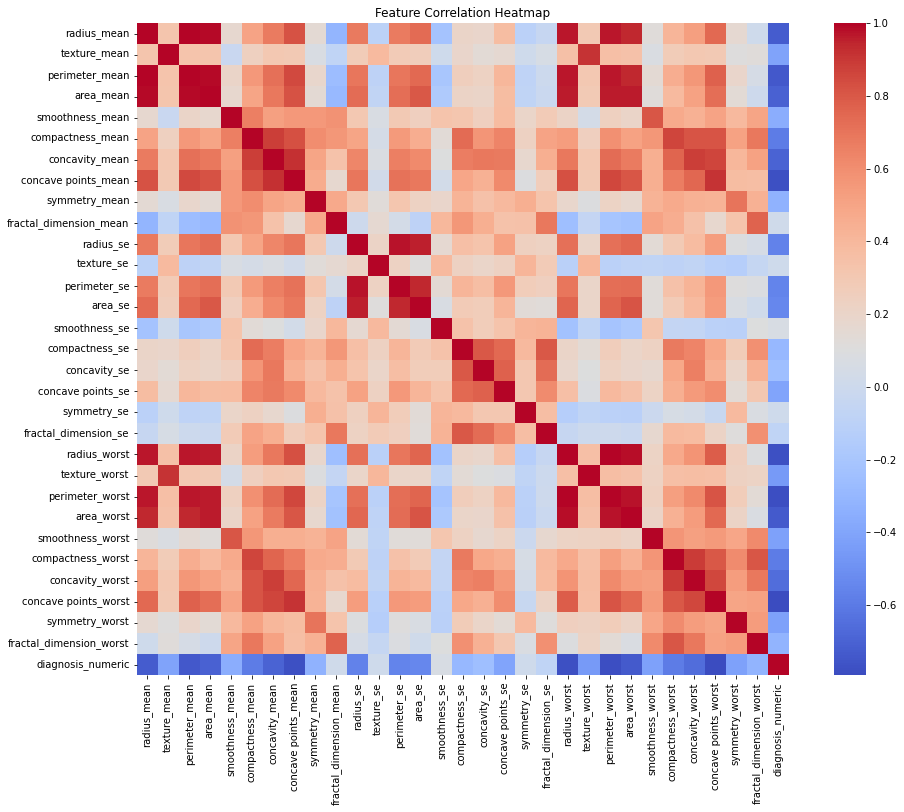

In [62]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

    

In [66]:
# Step 5: Define threshold for filtering relevant features
threshold = 0.4

# Get the correlation of each feature with 'diagnosis_numeric' and filter based on threshold
correlation_with_target = correlation_matrix['diagnosis_numeric'].abs()
relevant_features = correlation_with_target[correlation_with_target > threshold].index

# Create a DataFrame with only relevant features
df_relevant = df_train_scaled[relevant_features]

In [67]:
# List of all columns before filtering
all_columns = set(df_train_scaled.columns)

# List of columns retained based on correlation threshold
retained_columns = set(df_relevant.columns)

# Columns that were dropped
dropped_columns = all_columns - retained_columns

print("Retained Columns (Significantly Correlated):")
print(retained_columns)

print("\nDropped Columns (Low Correlation with Target):")
print(dropped_columns)


Retained Columns (Significantly Correlated):
{'perimeter_se', 'radius_se', 'compactness_worst', 'diagnosis_numeric', 'concavity_mean', 'radius_worst', 'compactness_mean', 'perimeter_mean', 'radius_mean', 'texture_worst', 'concave points_worst', 'concave points_mean', 'concavity_worst', 'perimeter_worst', 'concave points_se', 'area_worst', 'symmetry_worst', 'smoothness_worst', 'texture_mean', 'area_se', 'area_mean'}

Dropped Columns (Low Correlation with Target):
{'fractal_dimension_se', 'texture_se', 'symmetry_mean', 'concavity_se', 'symmetry_se', 'fractal_dimension_mean', 'compactness_se', 'smoothness_se', 'fractal_dimension_worst', 'smoothness_mean'}
